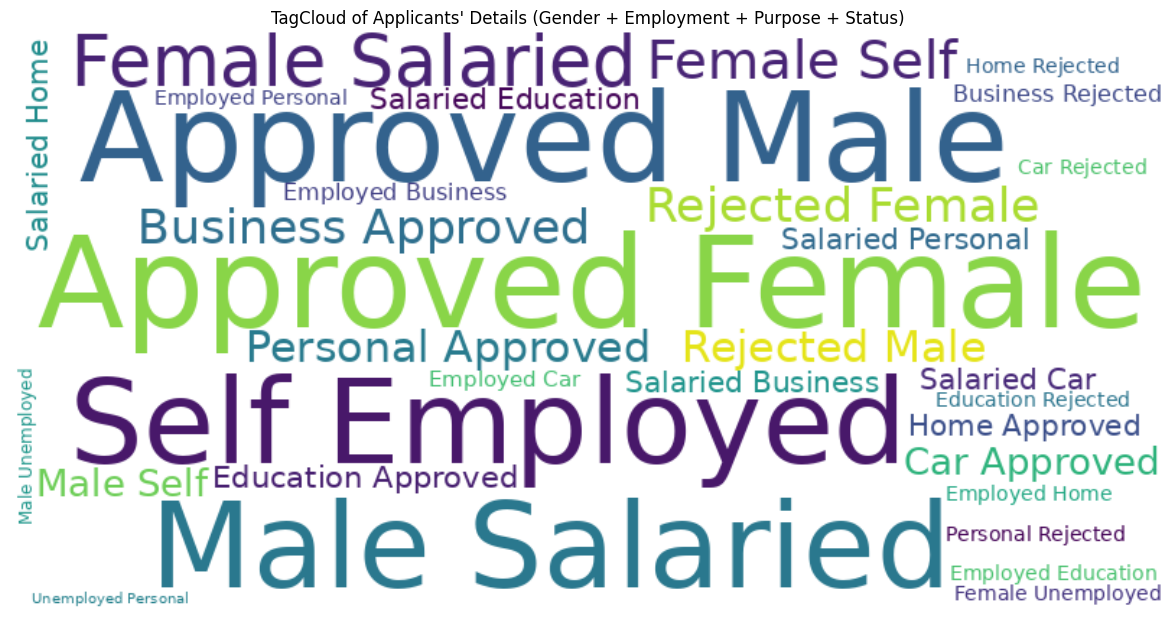

In [ ]:
# Install if not already installed
!pip install wordcloud

import pandas as pd
import matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/banking_loan_applications (1).csv")

# Combine categorical applicant details into one text string
text = " ".join(
    df['Gender'].astype(str) + " " +
    df['Employment_Type'].astype(str) + " " +
    df['Loan_Purpose'].astype(str) + " " +
    df['Loan_Status'].astype(str)
)

# Use matplotlib's built-in font (avoids OSError)
font_path = matplotlib.get_data_path() + "/fonts/ttf/DejaVuSans.ttf"

# Generate WordCloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    font_path=font_path
).generate(text)

# Plot
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TagCloud of Applicants' Details (Gender + Employment + Purpose + Status)")
plt.show()


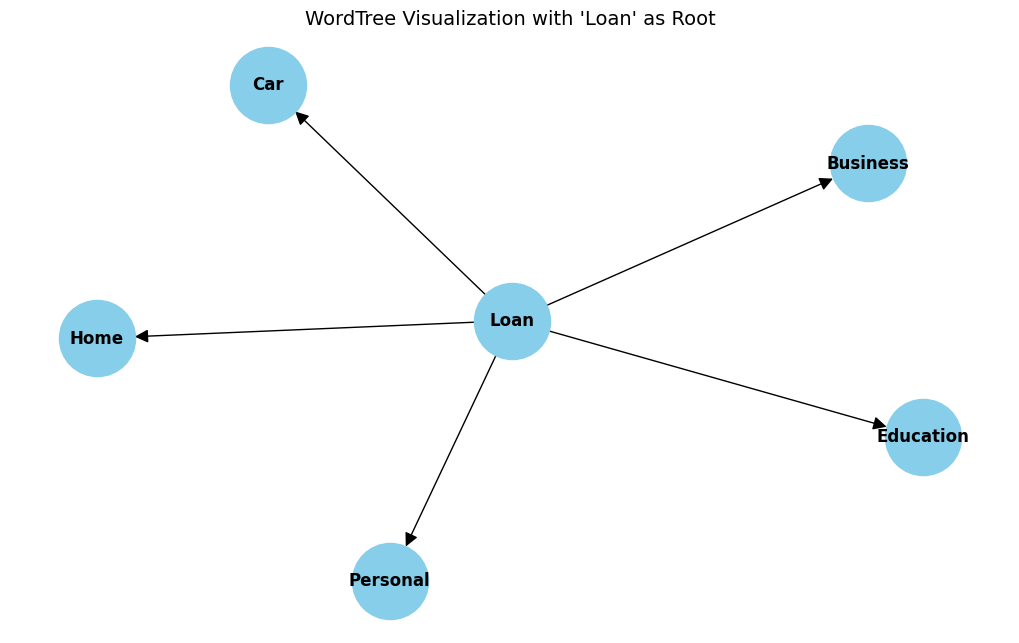

In [ ]:
# Task 7b: WordTree Visualization (with a fixed root node)

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load dataset
df = pd.read_csv("/content/banking_loan_applications.csv")

# Focus keyword as root node
root = "Loan"

# We'll connect root → Loan_Purpose for visualization
edges = [(root, purpose) for purpose in df['Loan_Purpose'].unique()]

# Create Graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Draw Graph
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, k=0.7, seed=42)  # Force-directed layout

nx.draw(G, pos, with_labels=True,
        node_size=3000, node_color="skyblue",
        font_size=12, font_weight="bold",
        arrows=True, arrowsize=20)

plt.title("WordTree Visualization with 'Loan' as Root", fontsize=14)
plt.show()
